In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# load csv file
citypath = "City_Data.csv"
ridepath = "Ride_Data.csv"
city_data = pd.read_csv(citypath)
ride_data = pd.read_csv(ridepath)

In [4]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Combine the data into a single dataset using outer method so as not to lose
# data that does not appear in both during the merge

combined = pd.merge(city_data, ride_data, how="outer", on="city")

In [6]:
# display the data table for preview
combined.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.630000e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100000e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.210000e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.550000e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200000e+11


In [7]:
# Create Bubble Plot of Ride Sharing Data===

In [8]:
# Determine the number of rides per city
# start by creating city groups
city_group = combined.groupby('city')
#if just did city_group.mean(), we would get avg of every column for each city
#by specifying "fare" column in brackets after .mean() we just get avg fare
#for each city
avg_fare = city_group.mean()['fare']
ride_count = city_group['ride_id'].count()

In [9]:
# make new data frame by adding columns to city_data dataframe
# set index to city so that the calculated values for each city can sync up with
# the city name (index acts as a key)

city_data = city_data.set_index("city")
city_data["average_fare"] = avg_fare
city_data["number_of_rides"] = ride_count

city_data.head()

,driver_count,type,average_fare,number_of_rides
city,,,,
Richardfort,38,Urban,22.373214,28
Williamsstad,59,Urban,24.362174,23
Port Angela,67,Urban,23.836842,19
Rodneyfort,34,Urban,28.616957,23
West Robert,39,Urban,25.123871,31


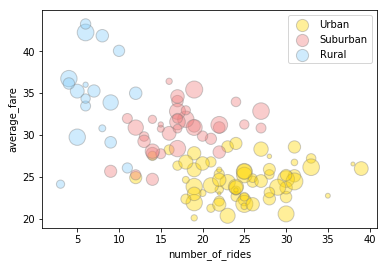

In [24]:
# need to create three diff sets of data to plot on the same graph so that we can have 
# different colors for urban, suburban, rural

urban_group = city_data.loc[city_data["type"] == "Urban"]
suburban_group = city_data.loc[city_data["type"] == "Suburban"]
rural_group = city_data.loc[city_data["type"] == "Rural"]

#create bubble plot
# the ax parameter is important bc without it you get three different plots
#doing ax=urban_bubbles when plotting suburban and rural puts everything on one
# s parameter left bubbles too small and it was hard to see diff sizes so i multiplied s parameter by numbers and found best looking value thru trial and error

urban_bubbles = urban_group.plot(kind="scatter", x="number_of_rides", y="average_fare", color="gold", s=city_data["driver_count"]*4, label = "Urban", alpha = 0.4, edgecolor = "grey", linewidths = 1)
suburban_bubbles = suburban_group.plot(kind='scatter', x='number_of_rides', y='average_fare', color='lightcoral',s=city_data['driver_count']*4, label = 'Suburban', alpha = 0.4, edgecolor = "grey", linewidths = 1, ax=urban_bubbles)
rural_bubbles = rural_group.plot(kind='scatter', x='number_of_rides', y='average_fare', color='lightskyblue',s=city_data['driver_count']*4, label = 'Rural', alpha = 0.4, edgecolor = "grey", linewidths = 1, ax=urban_bubbles)



In [25]:
# ===== Pie Chart % of Total Fares by City Type ======

In [43]:
# start by finding total fares overall, which requires using combined dataset
total_fares = combined["fare"].sum()

urban_combined = combined.loc[combined["type"] == "Urban"]
suburban_combined = combined.loc[combined["type"] == "Suburban"]
rural_combined = combined.loc[combined["type"] == "Rural"]

urban_fares = urban_combined["fare"].sum()
suburban_fares = suburban_combined["fare"].sum()
rural_fares = rural_combined["fare"].sum()

#Create Dataframe

city_type = ["Urban", "Suburban", "Rural"]
city_type_fares = [urban_fares, suburban_fares, rural_fares]
city_type_fares_colors = ["gold", "lightcoral", "lightskyblue"]
city_fares_explode = [0.1, 0, 0]

fares_df = pd.DataFrame(list(zip(city_type, city_type_fares)), columns=["city_type", "city_fares"])
fares_df = fares_df.set_index("city_type")

fares_df

,city_fares
city_type,
Urban,39854.38
Suburban,19356.33
Rural,4327.93


(-1.1438782760795045,
 1.0967103330300034,
 -1.2143053964633987,
 1.1105238494029046)

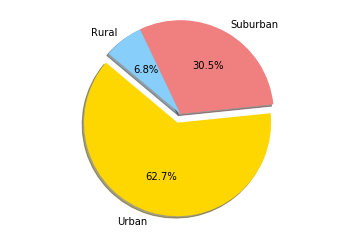

In [46]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_type_fares, explode=city_fares_explode, labels=city_type, colors=city_type_fares_colors, autopct="%1.1f%%",
 shadow=True, startangle=140)
# Create equal axes for nice circle
plt.axis("equal")